In [1]:
from nltk import word_tokenize

In [2]:
file = open('animals.txt','r')
words = file.read().split('\n')
#words = words[1:-1]
words

['Canidae',
 'Felidae',
 'Cat',
 'Cattle',
 'Dog',
 'Donkey',
 'Goat',
 'Guinea pig',
 'Horse',
 'Pig',
 'Rabbit',
 'Fancy rat varieties',
 'laboratory rat strains',
 'Sheep breeds',
 'Water buffalo breeds',
 'Chicken breeds',
 'Duck breeds',
 'Goose breeds',
 'Pigeon breeds',
 'Turkey breeds',
 'Aardvark',
 'Aardwolf',
 'African buffalo',
 'African elephant',
 'African leopard',
 'Albatross',
 'Alligator',
 'Alpaca',
 'American buffalo (bison)',
 'American robin',
 'Amphibian',
 'list',
 'Anaconda',
 'Angelfish',
 'Anglerfish',
 'Ant',
 'Anteater',
 'Antelope',
 'Antlion',
 'Ape',
 'Aphid',
 'Arabian leopard',
 'Arctic Fox',
 'Arctic Wolf',
 'Armadillo',
 'Arrow crab',
 'Asp',
 'Ass (donkey)',
 'Baboon',
 'Badger',
 'Bald eagle',
 'Bandicoot',
 'Barnacle',
 'Barracuda',
 'Basilisk',
 'Bass',
 'Bat',
 'Beaked whale',
 'Bear',
 'list',
 'Beaver',
 'Bedbug',
 'Bee',
 'Beetle',
 'Bird',
 'list',
 'Bison',
 'Blackbird',
 'Black panther',
 'Black widow spider',
 'Blue bird',
 'Blue jay',
 '

In [3]:
import spacy
nlp = spacy.load("en_core_web_md")

In [4]:
def vec(s):
    return nlp.vocab[s].vector

In [42]:
model = {}
for word in words:
    word_vec = vec(word)
    model[word] = word_vec
model

{'Canidae': array([-2.2821e-01,  1.8405e-01,  3.5676e-01, -7.4975e-01,  6.7651e-01,
         5.2926e-01,  8.4273e-02, -1.5906e-01,  2.9873e-01,  1.1813e-01,
        -1.5248e-01,  1.1789e-01, -4.3037e-01, -1.7087e-01,  1.5215e-01,
        -1.0848e-01, -1.3318e-01,  8.6705e-01,  1.2465e-01,  5.3072e-01,
         3.0319e-01,  1.7883e-01,  3.3421e-01, -1.0872e-01, -4.1389e-01,
         5.7836e-01, -3.4547e-01, -3.2104e-01,  1.2889e-01,  1.9348e-01,
        -3.3011e-01,  3.4330e-01,  3.2526e-01, -2.1123e-01, -5.4448e-02,
         3.5229e-01, -2.8981e-01, -4.2903e-02, -1.9468e-01, -1.5549e-01,
        -7.7415e-02,  1.4476e-02,  6.0719e-01,  2.3444e-01, -9.4367e-02,
         2.4881e-01, -1.8908e-01, -4.2991e-01,  4.6767e-03,  1.6338e-01,
        -8.2571e-02,  1.9586e-01,  9.8359e-01,  4.1336e-02,  3.9659e-01,
        -2.6746e-01, -4.8291e-02,  1.6943e-01, -4.2510e-02, -1.5602e-01,
         1.7777e-01, -4.9924e-01,  6.7234e-01,  1.8570e-01,  1.3189e-01,
        -2.1191e-01,  2.4327e-01, -6.014

In [6]:
from sklearn.manifold import TSNE
from gensim.models import word2vec

In [7]:
import matplotlib.pyplot as plt
labels = []
tokens = []
def tsne_plot(model): 

    for word in model:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

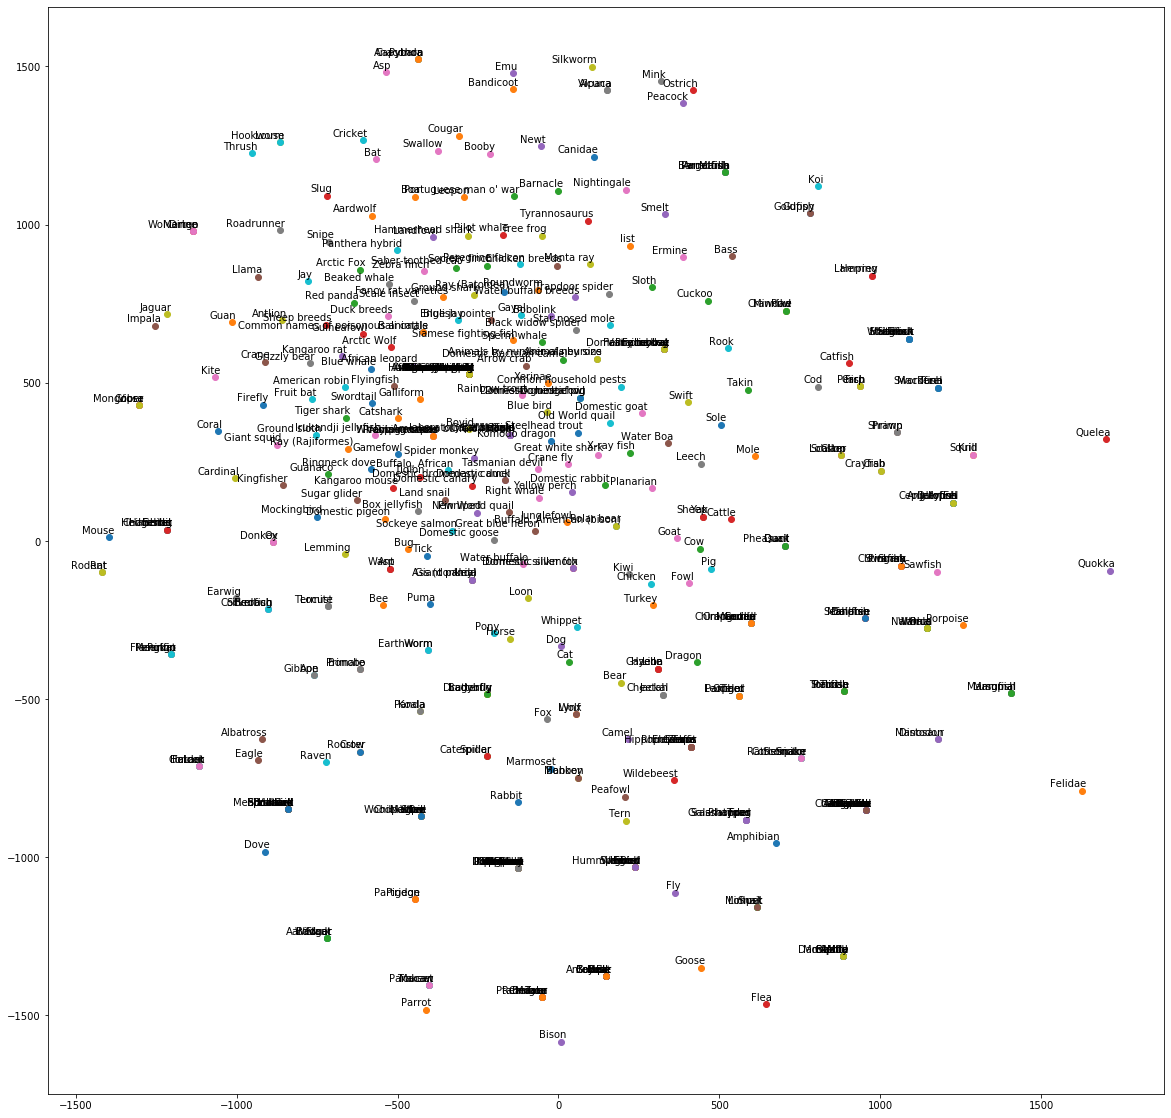

In [8]:
tsne_plot(model)

In [46]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)


array([[ 277.1962  , -858.7231  ],
       [ 995.4282  , -430.83716 ],
       [-285.77505 ,    6.386449],
       ...,
       [ 514.77374 ,  -18.505161],
       [ 514.77374 ,  -18.505161],
       [ 541.03284 , -278.93646 ]], dtype=float32)

In [68]:
coordinates = {}
for i in range(len(labels)):
    coordinates[labels[i]] = new_values[i].tolist()
coordinates

{'Canidae': [298.8429870605469, -876.2376098632812],
 'Felidae': [985.0165405273438, -456.73724365234375],
 'Cat': [-260.845703125, 21.04764175415039],
 'Cattle': [-33.59077835083008, 383.33367919921875],
 'Dog': [-312.55963134765625, 71.57158660888672],
 'Donkey': [-2.1306838989257812, 184.78009033203125],
 'Goat': [-26.673479080200195, 283.5135803222656],
 'Guinea pig': [797.0972900390625, -153.5959014892578],
 'Horse': [80.79142761230469, 253.2180633544922],
 'Pig': [-129.70687866210938, 156.36239624023438],
 'Rabbit': [-200.3852996826172, 94.68953704833984],
 'Fancy rat varieties': [433.7813720703125, -272.9740905761719],
 'laboratory rat strains': [433.7813720703125, -272.9740905761719],
 'Sheep breeds': [433.7813720703125, -272.9740905761719],
 'Water buffalo breeds': [641.9617309570312, -235.73165893554688],
 'Chicken breeds': [641.9617309570312, -235.73165893554688],
 'Duck breeds': [641.9617309570312, -235.73165893554688],
 'Goose breeds': [641.9617309570312, -235.731658935546

In [19]:
!pip install keras
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/2c/72/6b3264aa2889b7dde7663464b99587d95cd6a5f3b9b30181f14d78a63e64/tensorflow-2.0.0-cp37-cp37m-macosx_10_11_x86_64.whl
     |████████████████████████████████| 450kB 10.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/b8/83/755bd5324777875e9dff19c2e59daec837d0378c09196634524a3d7269ac/opt_einsum-3.1.0.tar.gz
     |████████████████████████████████| 2.3MB 12.0MB/s eta 0:00:01
     |████████████████████████████████| 1.4MB 35.9MB/s eta 0:00:01
     |████████████████████████████████| 61kB 17.5MB/s eta 0:00:01
     |████████████████████████████████| 112kB 23.8MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/8a/48/a76be51647d0eb9f10e2a4511bf3ffb8cc1e6b14e9e4fab46173aa79f981/termcolor-1.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/4e/35/11749bf99b2d4e3cceb4d55ca22590b0d7c2c62b9de38ac4a4a7f4687421/gast-0.2.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/d1/4f/

  Created wheel for opt-einsum: filename=opt_einsum-3.1.0-cp37-none-any.whl size=61682 sha256=04f590fe27043a0721b205bce2d09c723a5c0e5886da13e8810adfe50e5005e0
  Stored in directory: /Users/YinglanZHANG/Library/Caches/pip/wheels/2c/b1/94/43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
  Created wheel for absl-py: filename=absl_py-0.8.1-cp37-none-any.whl size=121167 sha256=0432d66b3c770e4a9e17fb1abffde2b12c438a945ed8f4aace238c0872c7e247
  Stored in directory: /Users/YinglanZHANG/Library/Caches/pip/wheels/a7/15/a0/0a0561549ad11cdc1bc8fa1191a353efd30facf6bfb507aefc
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4832 sha256=4a1cfa1b06479a23ed040978b94b94d7070e20ba5d1b1e33479aa85bba3e9560
  Stored in directory: /Users/YinglanZHANG/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=3c22213d489edfc9882a8419d2d67db2aa966e0f7145f92e23faee660f445dd

In [22]:
from keras.layers import Embedding

In [31]:
word1 = nlp('Pony')
word2 = nlp('Horse')
word1.similarity(word2)

0.7371492652531151

In [32]:
word3 = nlp('Whippet')
word2.similarity(word3)

0.3323095647230472